In [ ]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Time_Series/AirPassengers.csv')

Mounted at /content/drive


In [ ]:
#EDA on the time series data 
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.shape

(144, 2)

In [ ]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
del data['Month']

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


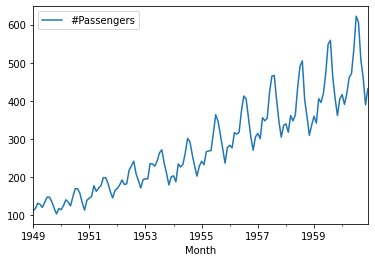

In [ ]:
#plotting the time series
data.plot()

In [ ]:
data.shape

(144, 1)

In [ ]:
mean_log = data.rolling(window=24).mean()
std_log = data.rolling(window=24).std()


In [ ]:
std_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,84.663946
1960-09-01,85.591283
1960-10-01,83.872823


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

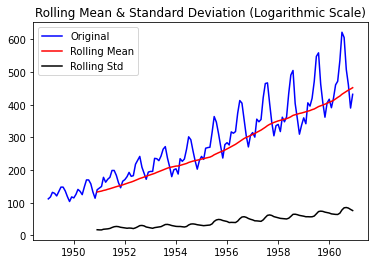

In [ ]:

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models, which we will see shortly.

Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

In [ ]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result)

(0.8153688792060472, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [ ]:
result = adfuller(data['#Passengers'].diff().dropna())
result

(-2.8292668241700056,
 0.054213290283824704,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

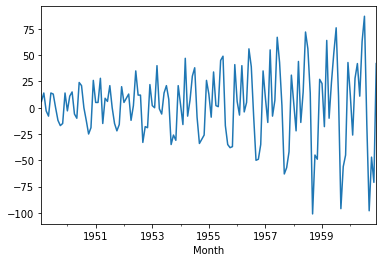

In [ ]:
data['#Passengers'].diff().dropna().plot()

If p value < 0.05 then time series is stationary else not stationary

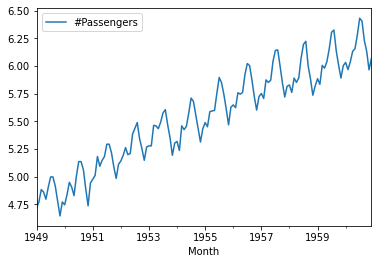

In [ ]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

In [ ]:
first_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [ ]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_log['#Passengers'])
print(result)

(-1.7170170891069603, 0.4223667747703914, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

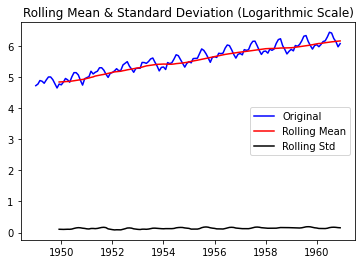

In [ ]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()  

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result)

(-3.162907991300889, 0.02223463000124189, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


In [ ]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

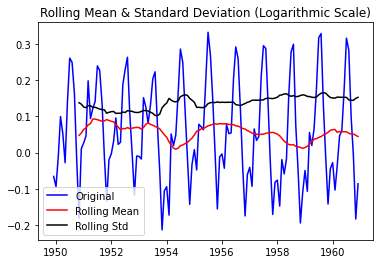

In [ ]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

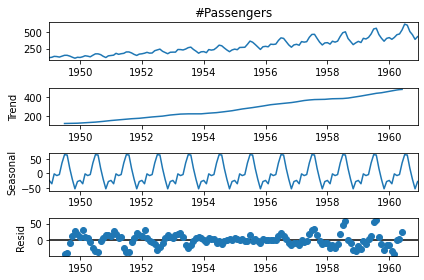

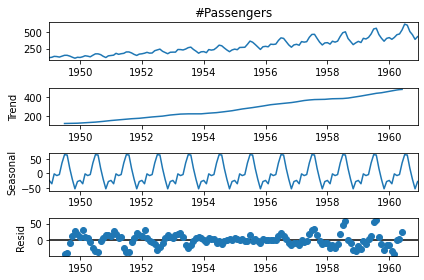

In [ ]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['#Passengers'].dropna())

decompose_result.plot()

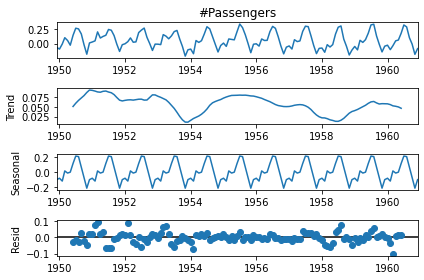

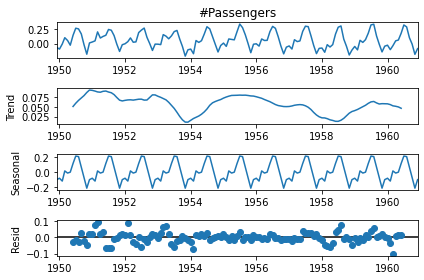

In [ ]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

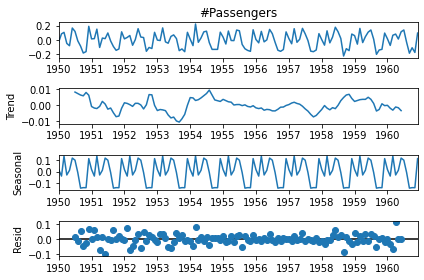

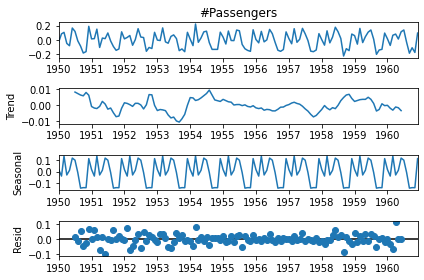

In [ ]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].diff().dropna())

decompose_result.plot()

ACF and PACF plots are used to identify the model's order in ARIMA models. These plots help to find the parameters p and q. Also, we always plot the ACF and PACF plots after making the time series stationary.

ACF - Autocorrelation Function PACF- PArtial Autocorrelation function


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


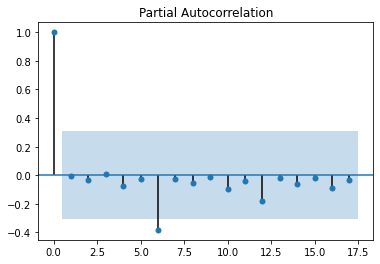

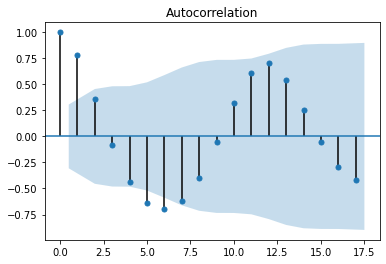

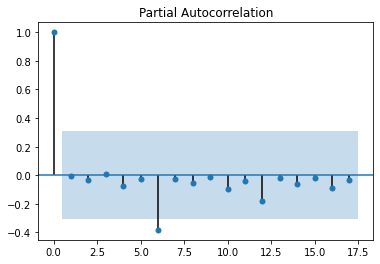

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
# model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [ ]:
len(train)+len(test)- 1

131

In [ ]:
new_data['predict'] = model_fit.predict(start= 2, 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
new_data[['#Passengers','predict']]

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,-0.040852
1950-03-01,0.099416,0.018173
1950-04-01,0.052142,0.038390
...,...,...
1960-08-01,0.282363,0.053782
1960-09-01,0.098235,0.053782
1960-10-01,-0.009230,0.053782


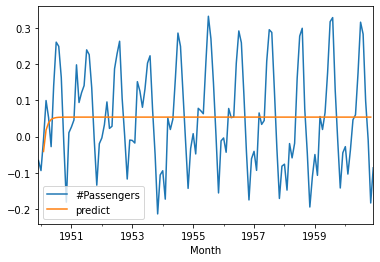

In [ ]:
new_data[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


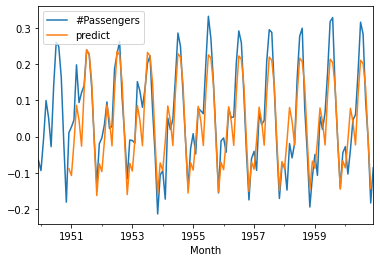

In [ ]:
new_data['predict'] = model.predict(start= 12 ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

In [ ]:
new_data

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.201373
1960-09-01,0.098235,0.132999
1960-10-01,-0.009230,-0.011896


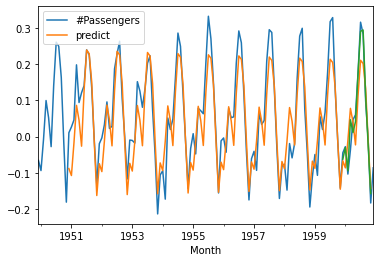

In [ ]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=12)
new_data.plot()
forecast.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
predict_df = new_data[120:131]
mean_squared_error(predict_df['#Passengers'],predict_df['predict'])
mean_absolute_percentage_error(predict_df['#Passengers'],predict_df['predict'])

0.8867384707069284